In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
import collections as co

In [2]:
data = pd.read_csv(r"C:\Users\Surface\Desktop\大四下\複雜系統\Coding\Final report\WHO-COVID-19-global-data.csv")

In [3]:
set_Country = set(data["Country"])
list_Country = list(set_Country)
list_data = data.values.tolist() #整個轉為list
print(list_Country)

['Saint Lucia', 'Niue', 'Georgia', 'Saint Pierre and Miquelon', 'Cuba', 'Iran (Islamic Republic of)', 'El Salvador', 'Eritrea', 'Belarus', 'New Caledonia', 'Andorra', 'Norway', 'Japan', 'Tokelau', 'Republic of Moldova', 'Viet Nam', 'Serbia', 'Barbados', 'Kuwait', 'Antigua and Barbuda', 'India', 'Thailand', 'Zambia', 'Malta', 'Djibouti', 'Nepal', 'Cyprus', 'Niger', 'Albania', 'Ethiopia', 'Haiti', 'Suriname', 'Marshall Islands', 'Saba', 'Bangladesh', 'Vanuatu', 'Liberia', 'British Virgin Islands', 'Jersey', 'Peru', 'Madagascar', 'Indonesia', 'Aruba', 'Equatorial Guinea', 'Morocco', 'Zimbabwe', 'Slovakia', 'The United Kingdom', 'Cayman Islands', "Lao People's Democratic Republic", 'Tonga', 'Uganda', 'Gambia', 'Azerbaijan', 'Libya', 'Panama', 'Malawi', 'Uzbekistan', 'Papua New Guinea', 'Angola', 'Mali', 'Wallis and Futuna', 'Bonaire', 'Pakistan', 'Mexico', 'Venezuela', 'Fiji', 'Paraguay', 'Liechtenstein', 'Other', 'Bulgaria', 'Finland', 'Monaco', 'Switzerland', 'Cambodia', 'North Macedonia

In [4]:
for i in list_Country:
    locals()[str(i) + "_data"] = []
    for j in range(0, len(list_data)):
        if(list_data[j][1] == i):
            locals()[str(i) + "_data"].append([[list_data[j][0]], list_data[j][2:6]])
        
        else:
            pass

In [5]:
print(locals()[str("Afghanistan") + "_data"])
print(locals()[str("Afghanistan") + "_data"][0])
print(locals()[str("Afghanistan") + "_data"][0][0])
print(locals()[str("Afghanistan") + "_data"][0][1])

[[['2020/1/3'], [0, 0, 0, 0]], [['2020/1/4'], [0, 0, 0, 0]], [['2020/1/5'], [0, 0, 0, 0]], [['2020/1/6'], [0, 0, 0, 0]], [['2020/1/7'], [0, 0, 0, 0]], [['2020/1/8'], [0, 0, 0, 0]], [['2020/1/9'], [0, 0, 0, 0]], [['2020/1/10'], [0, 0, 0, 0]], [['2020/1/11'], [0, 0, 0, 0]], [['2020/1/12'], [0, 0, 0, 0]], [['2020/1/13'], [0, 0, 0, 0]], [['2020/1/14'], [0, 0, 0, 0]], [['2020/1/15'], [0, 0, 0, 0]], [['2020/1/16'], [0, 0, 0, 0]], [['2020/1/17'], [0, 0, 0, 0]], [['2020/1/18'], [0, 0, 0, 0]], [['2020/1/19'], [0, 0, 0, 0]], [['2020/1/20'], [0, 0, 0, 0]], [['2020/1/21'], [0, 0, 0, 0]], [['2020/1/22'], [0, 0, 0, 0]], [['2020/1/23'], [0, 0, 0, 0]], [['2020/1/24'], [0, 0, 0, 0]], [['2020/1/25'], [0, 0, 0, 0]], [['2020/1/26'], [0, 0, 0, 0]], [['2020/1/27'], [0, 0, 0, 0]], [['2020/1/28'], [0, 0, 0, 0]], [['2020/1/29'], [0, 0, 0, 0]], [['2020/1/30'], [0, 0, 0, 0]], [['2020/1/31'], [0, 0, 0, 0]], [['2020/2/1'], [0, 0, 0, 0]], [['2020/2/2'], [0, 0, 0, 0]], [['2020/2/3'], [0, 0, 0, 0]], [['2020/2/4'], [0

In [6]:
for j in list_Country:

    locals()[str("{}".format(j)) + "_time"] = []
    locals()[str("{}".format(j)) + "_New_cases"] = []
    locals()[str("{}".format(j)) + "_Cumulative_cases"] = []
    locals()[str("{}".format(j)) + "_New_deaths"] = []
    locals()[str("{}".format(j)) + "_Cumulative_deaths"] = []

    for i in range( 0, len(locals()[str("{}".format(j)) + "_data"]) ):
        locals()[str("{}".format(j)) + "_time"].append(locals()[str("{}".format(j)) + "_data"][i][0][0])
        locals()[str("{}".format(j)) + "_New_cases"].append(locals()[str("{}".format(j)) + "_data"][i][1][0])
        locals()[str("{}".format(j)) + "_Cumulative_cases"].append(locals()[str("{}".format(j)) + "_data"][i][1][1])
        locals()[str("{}".format(j)) + "_New_deaths"].append(locals()[str("{}".format(j)) + "_data"][i][1][2])
        locals()[str("{}".format(j)) + "_Cumulative_deaths"].append(locals()[str("{}".format(j)) + "_data"][i][1][3])

## 全球累計確診人口

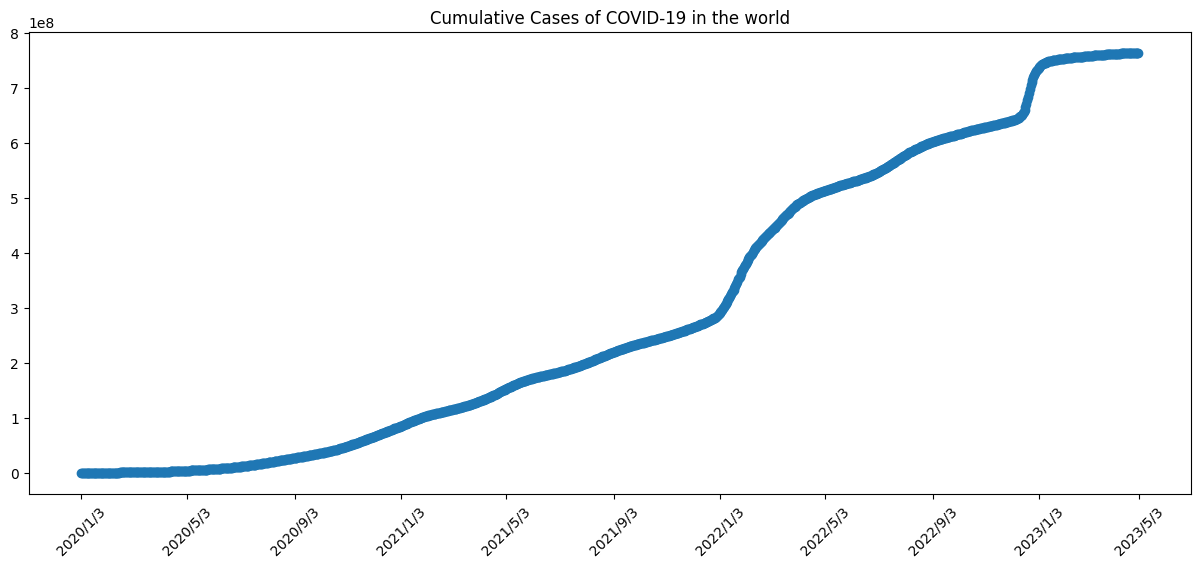

In [17]:
total_cases = []

# 1210 是總天數 (2020/01/03 - 2022/04/26)
for i in range(0, 1210):
    
    sum = 0
    for j in list_Country:
        sum = sum + locals()[str("{}".format(j)) + "_Cumulative_cases"][i]
    
    total_cases.append(sum)

time = locals()[str("{}".format("{}".format("Afghanistan"))) + "_time"]


rang = ["2020/1/3", "2020/5/3", "2020/9/3",
            "2021/1/3", "2021/5/3", "2021/9/3",
            "2022/1/3", "2022/5/3", "2022/9/3",
            "2023/1/3", "2023/5/3"]

plt.figure(figsize = (15, 6))
plt.title("Cumulative Cases of COVID-19 in the world")
plt.scatter(time, total_cases)
plt.xticks(rang, rotation = 45)
plt.show()

## 全球的新增人口

### Normal

[8, 4, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

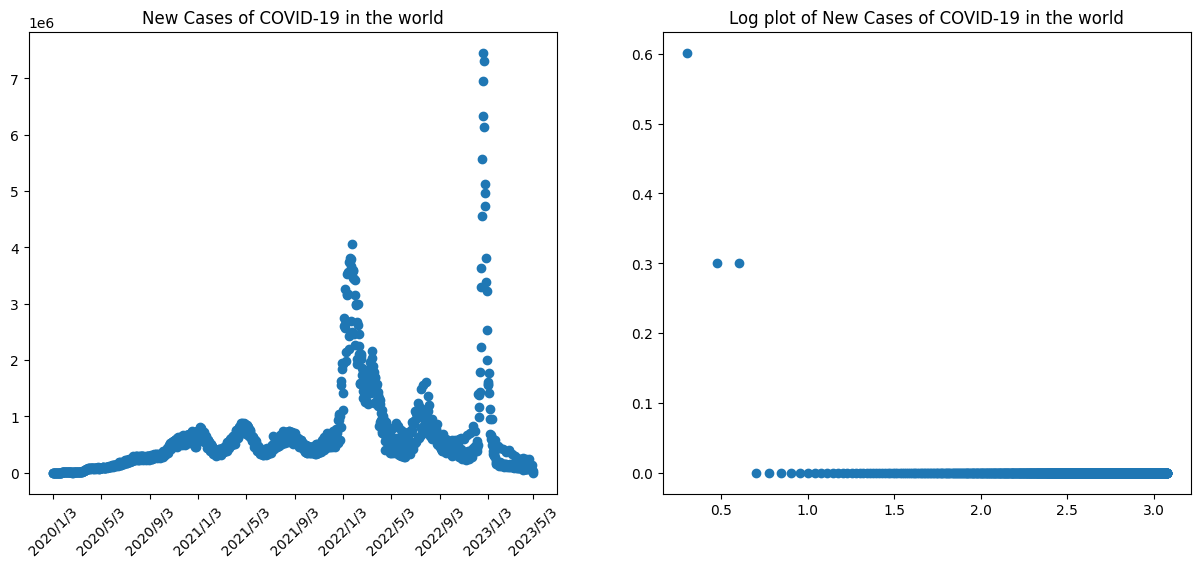

In [46]:
total_cases = []

# 1210 是總天數 (2020/01/03 - 2022/04/26)
for i in range(0, 1210):
    
    sum = 0
    for j in list_Country:
        sum = sum + locals()[str("{}".format(j)) + "_New_cases"][i]
    
    total_cases.append(sum)

time = locals()[str("{}".format("{}".format("Afghanistan"))) + "_time"]

count = []
cate = list(set(total_cases))
for i in range(0, len(cate)):
    count.append(co.Counter(total_cases)[cate[i]])
count = sorted(count, reverse = True) #由大到小排列

x = np.linspace(1, len(count), len(count))
print(count)

log_count = []
log_x = []
for j in range(len(count)):
    log_count.append(np.log10(count[j]))
    log_x.append(np.log10(x[j]))

log_count.remove(log_count[0])
log_x.remove(log_x[0])

rang = ["2020/1/3", "2020/5/3", "2020/9/3",
            "2021/1/3", "2021/5/3", "2021/9/3",
            "2022/1/3", "2022/5/3", "2022/9/3",
            "2023/1/3", "2023/5/3"]

print(log_count)

plt.figure(figsize = (15, 6))
plt.subplot(121)
plt.title("New Cases of COVID-19 in the world")
plt.scatter(time, total_cases)
plt.xticks(rang, rotation = 45)

plt.subplot(122)
plt.title("Log plot of New Cases of COVID-19 in the world")
plt.scatter(log_x, log_count)
plt.show()

### 新增人口比率

[12, 11, 8, 8, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

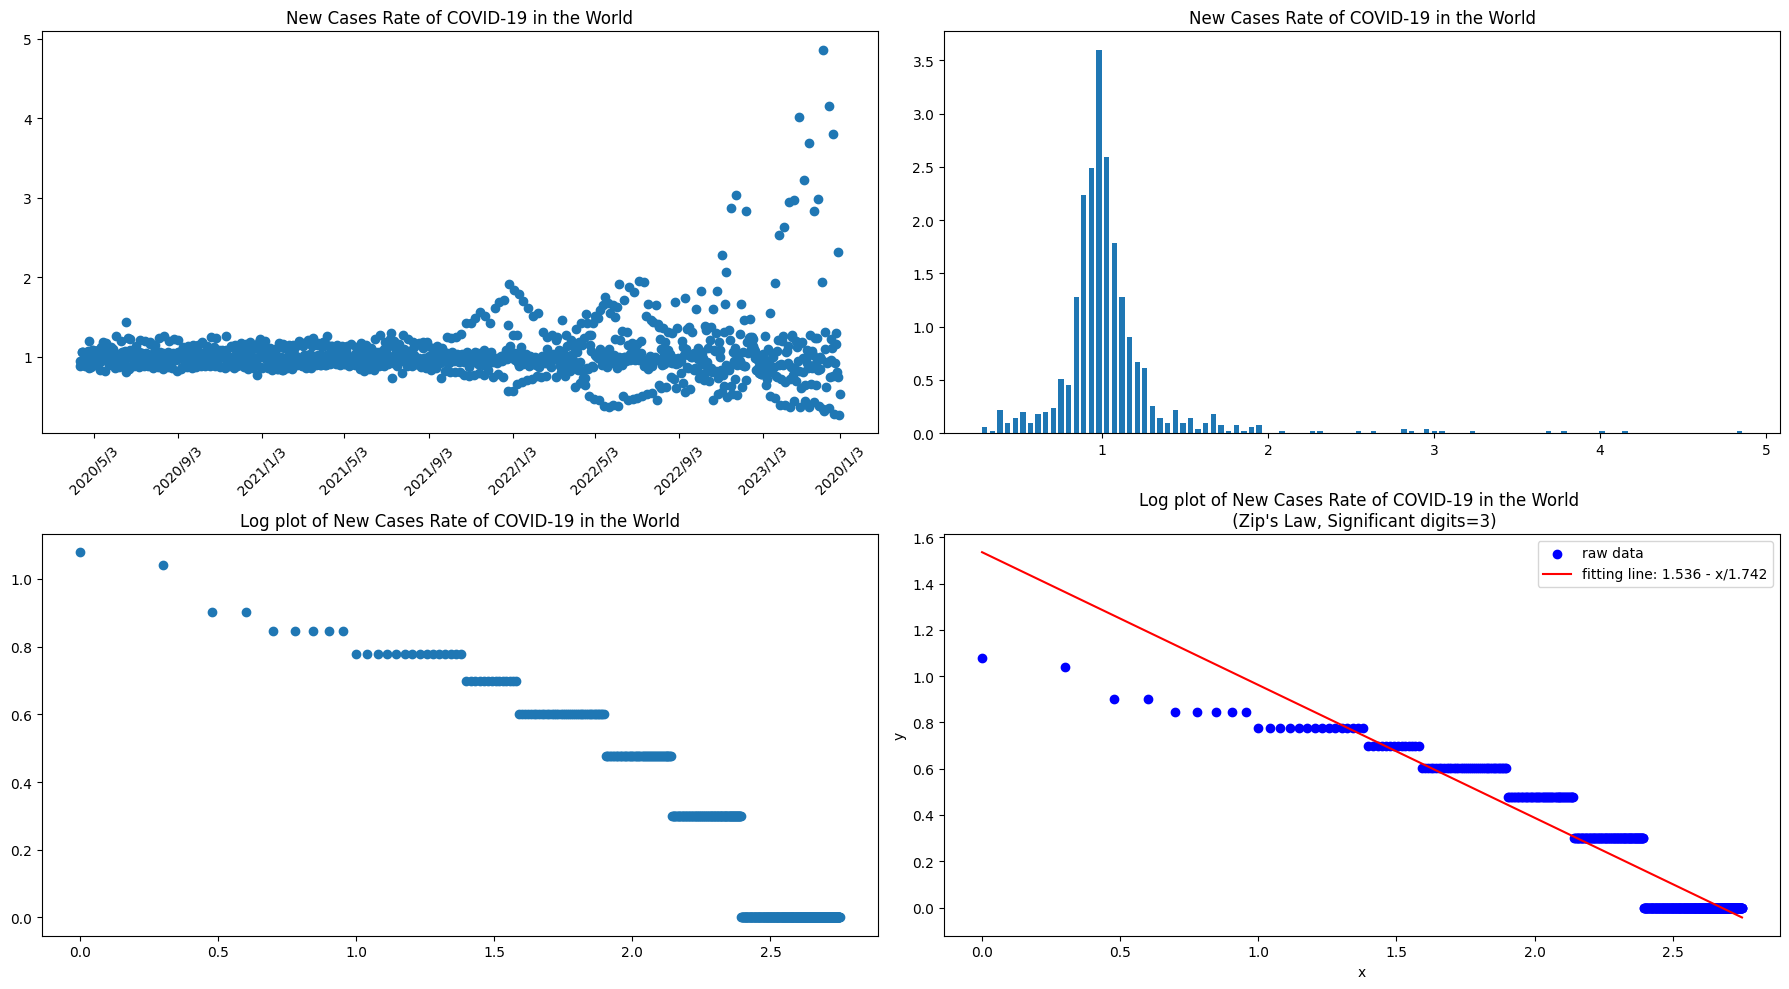

In [153]:
dig = 3

total_cases = []

# 1210 是總天數 (2020/01/03 - 2022/04/26)
for i in range(0, 1210):
    
    sum = 0
    for j in list_Country:
        sum = sum + locals()[str("{}".format(j)) + "_New_cases"][i]
    
    total_cases.append(sum)

time = locals()[str("{}".format("{}".format("Afghanistan"))) + "_time"]

total_cases_rate = []
start = 100
for i in range(start, 1210-1):
    total_cases_rate.append( round(total_cases[i]/total_cases[i-1], dig) )


plt.figure(figsize = (18, 10))
plt.subplot(221)
plt.title("New Cases Rate of COVID-19 in the World")
plt.scatter(time[ start:(1210-1) ], total_cases_rate)
plt.xticks(rang, rotation = 45)

######################################################################

# count = pd.value_counts(total_cases_rate)
# count = list(count)

count = []
cate = list(set(total_cases_rate))
for i in range(0, len(cate)):
    count.append(co.Counter(total_cases_rate)[cate[i]])
count = sorted(count, reverse = True) #由大到小排列
x = np.linspace(1, len(count), len(count))

print(count)
print(total_cases_rate)

log_count = []
log_x = []
for j in range(len(count)):
    log_count.append(np.log10(count[j]))
    log_x.append(np.log10(x[j]))

# log_count.remove(log_count[0])
# log_x.remove(log_x[0])


rang = ["2020/1/3", "2020/5/3", "2020/9/3",
            "2021/1/3", "2021/5/3", "2021/9/3",
            "2022/1/3", "2022/5/3", "2022/9/3",
            "2023/1/3"]



plt.subplot(222)
plt.hist(total_cases_rate, bins = 100, density = True, rwidth = 0.7)
plt.title("New Cases Rate of COVID-19 in the World")
# plt.xlim(0, 2)

####################################################################

plt.subplot(223)
plt.title("Log plot of New Cases Rate of COVID-19 in the World")
plt.scatter(log_x, log_count)

##########################################################################

# FITTING

x0 = log_x
y0 = log_count

def function(x, c, a):
    return c - x/a
fitt=(1.5, 0.5) # 猜 x = 1, y = 2*pi
popt,pcov= curve_fit(function, x0, y0, p0=fitt)
perr=np.sqrt(np.diag(pcov))
print(popt)
popt = np.round(popt, 3)
#print(pcov)
print(perr)
plt.subplot(224)
plt.title("Log plot of New Cases Rate of COVID-19 in the World \n (Zip's Law, Significant digits={})".format(dig))
plt.scatter(x0, y0, color="blue", label="raw data")
plt.plot(x0, 
        function(np.array(x0), *popt),
        color="red", 
        label="fitting line: {} - x/{}".format(*popt))
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc = 'upper right')

plt.tight_layout()
plt.savefig("New Cases Rate of COVID-19 in the World (Zip's Law, digits={}).PNG".format(dig))

### 新增比率Probability Density Function

[0.08515987 0.79030363]


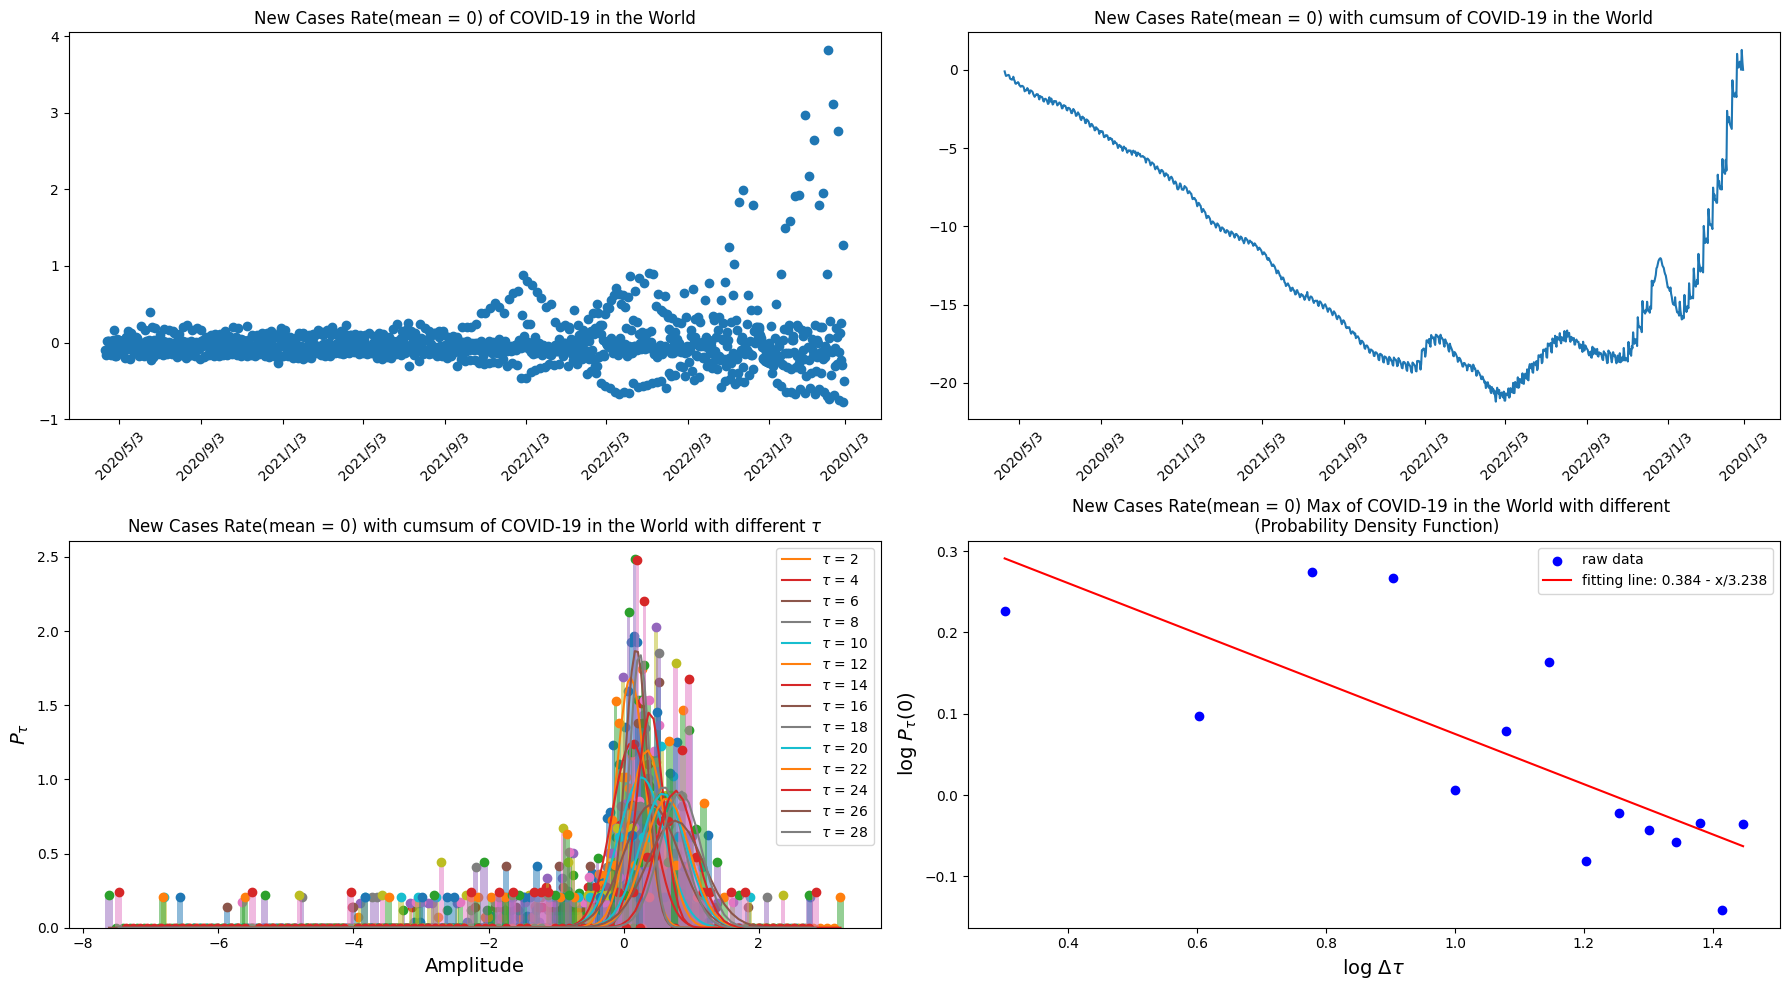

In [146]:
total_cases_rate_mean = np.array(total_cases_rate) - np.mean(total_cases_rate)

p_raw_data = np.cumsum(total_cases_rate_mean)
x = time[ start:(1210-1) ]

rang = ["2020/1/3", "2020/5/3", "2020/9/3",
            "2021/1/3", "2021/5/3", "2021/9/3",
            "2022/1/3", "2022/5/3", "2022/9/3",
            "2023/1/3"]

plt.figure(figsize = (18, 10))
plt.subplot(221)
plt.title("New Cases Rate(mean = 0) of COVID-19 in the World")
plt.scatter(x, total_cases_rate_mean)
plt.xticks(rang, rotation = 45)

plt.subplot(222)
plt.title("New Cases Rate(mean = 0) with cumsum of COVID-19 in the World")
# plt.xlabel("t", fontsize = "14")
# plt.ylabel("Position", fontsize = "14")
plt.plot(x, p_raw_data)
plt.xticks(rang, rotation = 45)

#################################################################################

# 設定取樣頻率
# 設定變數
# size = [1, 2, 4, 8, 16, 32]
size = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28]

for j in size:
    locals()["data_" + str(j) + "_tr"] = []
    locals()["data_" + str(j)] = [] # 取樣後的震盪圖
    

    locals()["data_" + str(j) + "_tr"] = p_raw_data[0:len(p_raw_data):j] # 把原始資料累加的結果取樣

    locals()["data_" + str(j)].append( locals()["data_" + str(j) + "_tr"][0] )

    # 把原始資料累加的結果取樣重新畫回震盪圖
    for i in range(len(locals()["data_" + str(j) + "_tr"])-1):
        locals()["data_" + str(j)].append( locals()["data_" + str(j) + "_tr"][i] - locals()["data_" + str(j) + "_tr"][i+1])
        
####################################################################################################################################################

def g_function(x, A, sigma, mu):
    return A*(np.e**(-((x-mu)**2) / (2*sigma**2)))/(sigma*np.sqrt(2*np.pi))

# def g_function(x, A, sigma):
#     return A*(np.e**(-((x)**2) / (2*sigma**2)))/(sigma*np.sqrt(2*np.pi))

plt.subplot(223)
test = []
Max = []

for j in size:
    
    locals()["data_" + str(j) + "_n"], locals()["data_" + str(j) + "_h_bins"], patches = plt.hist(
                                                                                    locals()["data_" + str(j)],  
                                                                                    density = True, 
                                                                                    alpha = 0.5,
                                                                                    bins = 100
                                                                                    )
    
    mid_bins = []
    for i in range( len(locals()["data_" + str(j) + "_h_bins"])-1 ):
        mid_bins.append( (locals()["data_" + str(j) + "_h_bins"][i] + locals()["data_" + str(j) + "_h_bins"][i+1])/2 )

    plt.scatter( mid_bins, locals()["data_" + str(j) + "_n"] )

    locals()["data_" + str(j) + "_bins"] = []

    for i in range(0, len(locals()["data_" + str(j) + "_h_bins"])-1):
        locals()["data_" + str(j) + "_bins"].append( (locals()["data_" + str(j) + "_h_bins"][i] + locals()["data_" + str(j) + "_h_bins"][i+1])/2)
    
    #plt.scatter(locals()["data_" + str(j) + "_bins"], locals()["data_" + str(j) + "_n"])

    x0 = locals()["data_" + str(j) + "_bins"]
    y0 = locals()["data_" + str(j) + "_n"]

    fitt=(50000/j, 1, 0)
    # fitt=(50000/j, 1)

    popt,pcov= curve_fit(g_function, x0, y0, p0=fitt)
    # print(popt, g_function(popt[2],*popt))
    plt.title(r"New Cases Rate(mean = 0) with cumsum of COVID-19 in the World with different $\tau$")
    plt.xlabel("Amplitude", fontsize = 14)
    plt.ylabel(r"$P_{\tau}$", fontsize = 14)
    plt.plot(x0, 
            g_function(x0,*popt), 
            label=r"$\tau$ = {}".format(j))
    plt.legend(loc = "best")

    Max.append(np.log10(g_function(popt[2],*popt)))
    test.append(np.log10(j))

###########################################################################################################

x0 = test
y0 = Max

def function(x, c, a):
    return c - x/a
fitt=(-0.4, 3.3) # 猜 x = 1, y = 2*pi
popt,pcov= curve_fit(function, x0, y0, p0=fitt)
perr=np.sqrt(np.diag(pcov))
popt = np.round(popt, 3)
#print(pcov)
print(perr)

plt.subplot(224)
plt.title("New Cases Rate(mean = 0) Max of COVID-19 in the World with different \n (Probability Density Function)")
plt.scatter(x0, y0, color="blue", label="raw data")
plt.plot(x0, 
        function(np.array(x0), *popt),
        color="red", 
        label="fitting line: {} - x/{}".format(*popt))
plt.xlabel(r"log $\Delta$$\tau$", fontsize = 14)
plt.ylabel(r"log $P_{\tau}(0)$", fontsize = 14)
plt.legend(loc = 'upper right')
plt.tight_layout()
plt.savefig("New Cases Rate of COVID-19 in the World (Probability Density Function).PNG")


### ~整理前~

In [ ]:
total_cases_rate_mean = np.array(total_cases_rate) - np.mean(total_cases_rate)

p_raw_data = np.cumsum(total_cases_rate_mean)
x = time[ start:(1210-1) ]

rang = ["2020/1/3", "2020/5/3", "2020/9/3",
            "2021/1/3", "2021/5/3", "2021/9/3",
            "2022/1/3", "2022/5/3", "2022/9/3",
            "2023/1/3"]

plt.figure(figsize = (15, 12))
plt.subplot(221)
plt.title("New Cases Rate(mean = 0) of COVID-19 in the World")
plt.scatter(x, total_cases_rate_mean)
plt.xticks(rang, rotation = 45)

plt.subplot(222)
plt.title("New Cases Rate(mean = 0) with cumsum of COVID-19 in the World")
# plt.xlabel("t", fontsize = "14")
# plt.ylabel("Position", fontsize = "14")
plt.plot(x, p_raw_data)
plt.xticks(rang, rotation = 45)

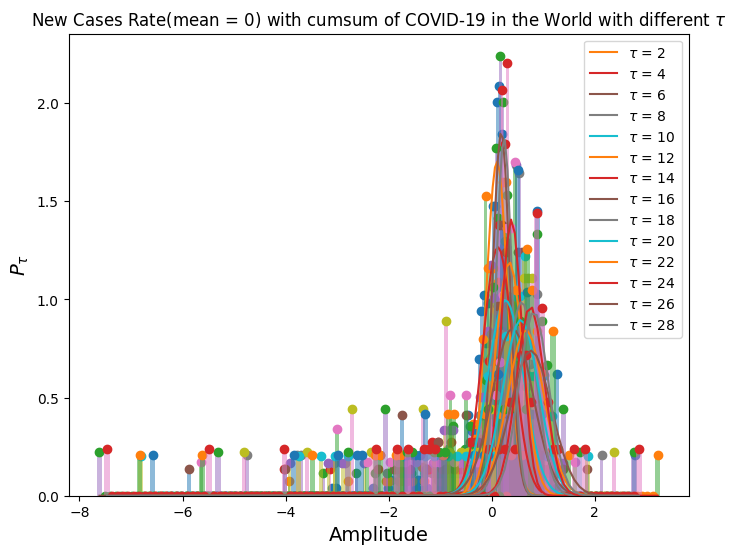

In [126]:
# 設定取樣頻率
# 設定變數
# size = [1, 2, 4, 8, 16, 32]
size = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28]

for j in size:
    locals()["data_" + str(j) + "_tr"] = []
    locals()["data_" + str(j)] = [] # 取樣後的震盪圖
    

    locals()["data_" + str(j) + "_tr"] = p_raw_data[0:len(p_raw_data):j] # 把原始資料累加的結果取樣

    locals()["data_" + str(j)].append( locals()["data_" + str(j) + "_tr"][0] )

    # 把原始資料累加的結果取樣重新畫回震盪圖
    for i in range(len(locals()["data_" + str(j) + "_tr"])-1):
        locals()["data_" + str(j)].append( locals()["data_" + str(j) + "_tr"][i] - locals()["data_" + str(j) + "_tr"][i+1])
        
####################################################################################################################################################

def g_function(x, A, sigma, mu):
    return A*(np.e**(-((x-mu)**2) / (2*sigma**2)))/(sigma*np.sqrt(2*np.pi))

# def g_function(x, A, sigma):
#     return A*(np.e**(-((x)**2) / (2*sigma**2)))/(sigma*np.sqrt(2*np.pi))

fig1 = plt.figure(figsize = (8, 6))
test = []
Max = []

for j in size:
    
    locals()["data_" + str(j) + "_n"], locals()["data_" + str(j) + "_h_bins"], patches = plt.hist(
                                                                                    locals()["data_" + str(j)],  
                                                                                    density = True, 
                                                                                    alpha = 0.5,
                                                                                    bins = 100
                                                                                    )
    
    mid_bins = []
    for i in range( len(locals()["data_" + str(j) + "_h_bins"])-1 ):
        mid_bins.append( (locals()["data_" + str(j) + "_h_bins"][i] + locals()["data_" + str(j) + "_h_bins"][i+1])/2 )

    plt.scatter( mid_bins, locals()["data_" + str(j) + "_n"] )

    locals()["data_" + str(j) + "_bins"] = []

    for i in range(0, len(locals()["data_" + str(j) + "_h_bins"])-1):
        locals()["data_" + str(j) + "_bins"].append( (locals()["data_" + str(j) + "_h_bins"][i] + locals()["data_" + str(j) + "_h_bins"][i+1])/2)
    
    #plt.scatter(locals()["data_" + str(j) + "_bins"], locals()["data_" + str(j) + "_n"])

    x0 = locals()["data_" + str(j) + "_bins"]
    y0 = locals()["data_" + str(j) + "_n"]

    fitt=(50000/j, 1, 0)
    # fitt=(50000/j, 1)

    popt,pcov= curve_fit(g_function, x0, y0, p0=fitt)
    # print(popt, g_function(popt[2],*popt))
    plt.title(r"New Cases Rate(mean = 0) with cumsum of COVID-19 in the World with different $\tau$")
    plt.xlabel("Amplitude", fontsize = 14)
    plt.ylabel(r"$P_{\tau}$", fontsize = 14)
    plt.plot(x0, 
            g_function(x0,*popt), 
            label=r"$\tau$ = {}".format(j))
    plt.legend(loc = "best")

    Max.append(np.log10(g_function(popt[2],*popt)))
    test.append(np.log10(j))

[0.08087111 0.78013403]


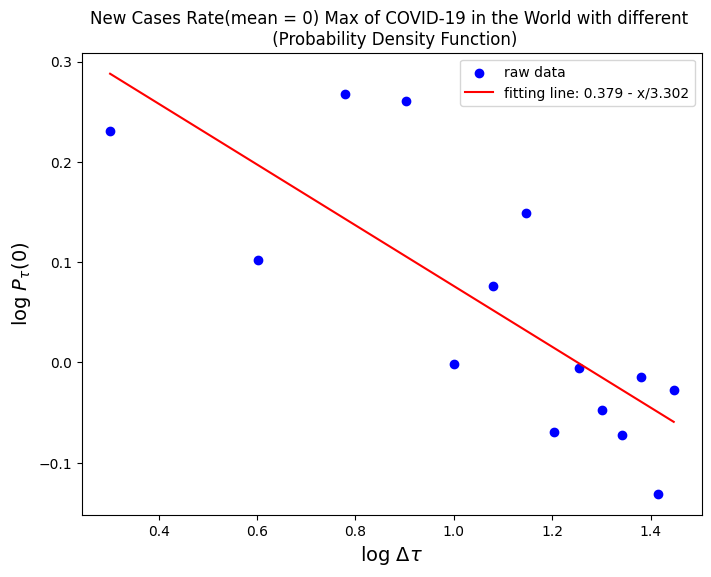

In [134]:
x0 = test
y0 = Max

def function(x, c, a):
    return c - x/a
fitt=(-0.4, 3.3) # 猜 x = 1, y = 2*pi
popt,pcov= curve_fit(function, x0, y0, p0=fitt)
perr=np.sqrt(np.diag(pcov))
popt = np.round(popt, 3)
#print(pcov)
print(perr)
plt.figure(figsize=(8, 6))
plt.title("New Cases Rate(mean = 0) Max of COVID-19 in the World with different \n (Probability Density Function)")
plt.scatter(x0, y0, color="blue", label="raw data")
plt.plot(x0, 
        function(np.array(x0), *popt),
        color="red", 
        label="fitting line: {} - x/{}".format(*popt))
plt.xlabel(r"log $\Delta$$\tau$", fontsize = 14)
plt.ylabel(r"log $P_{\tau}(0)$", fontsize = 14)
plt.legend(loc = 'upper right')
plt.savefig("New Cases Rate of COVID-19 in the World (Probability Density Function).PNG")

## 單獨國家時間的新增人口

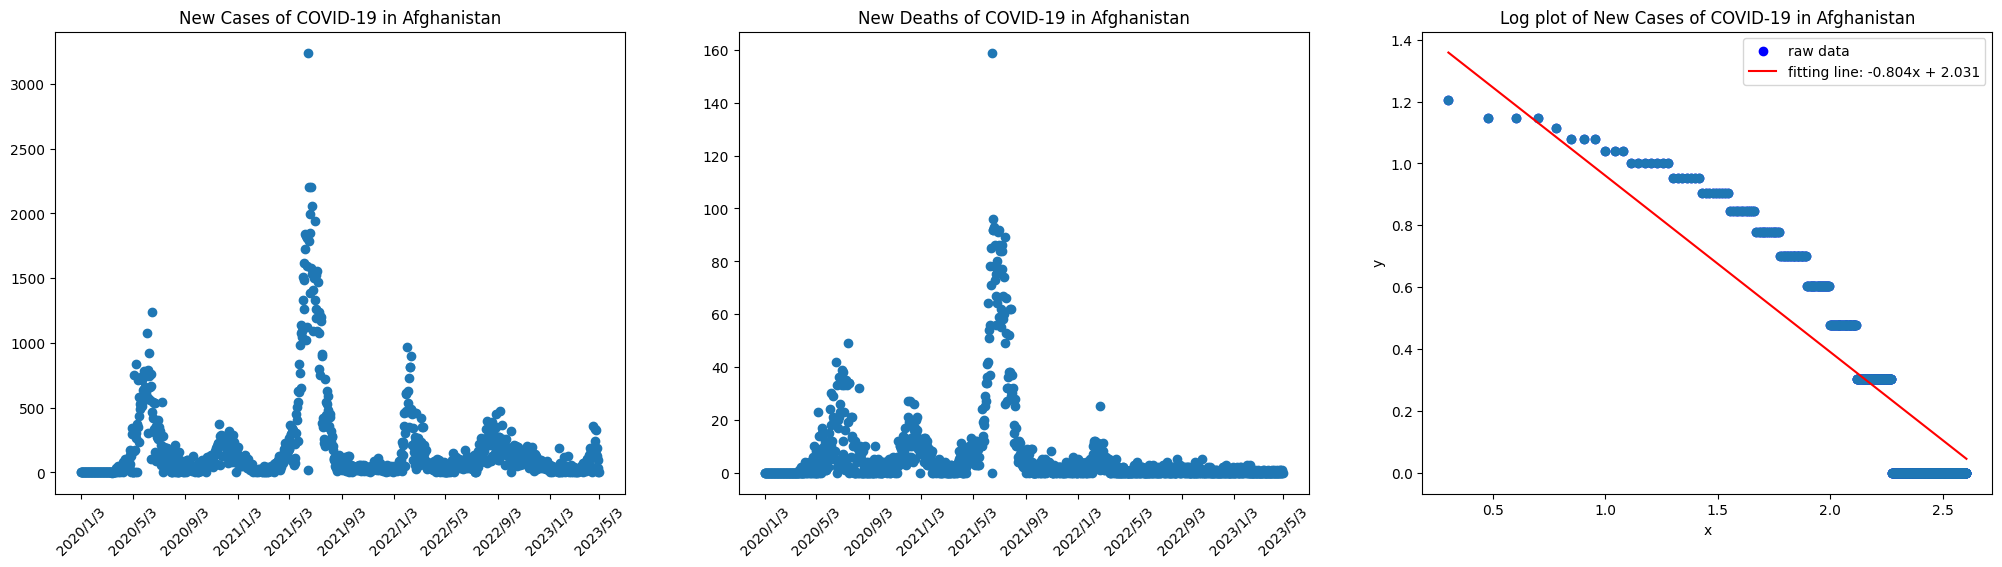

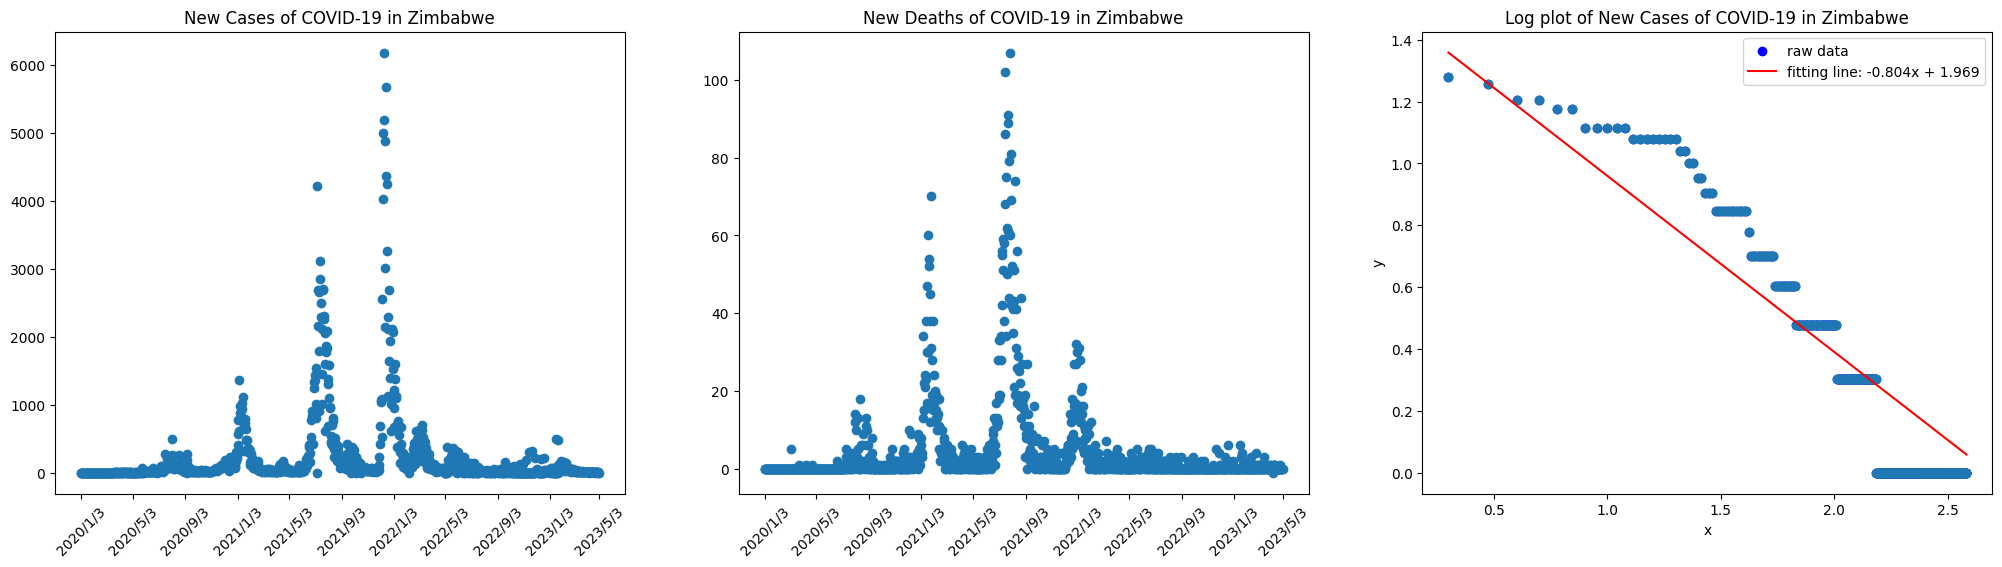

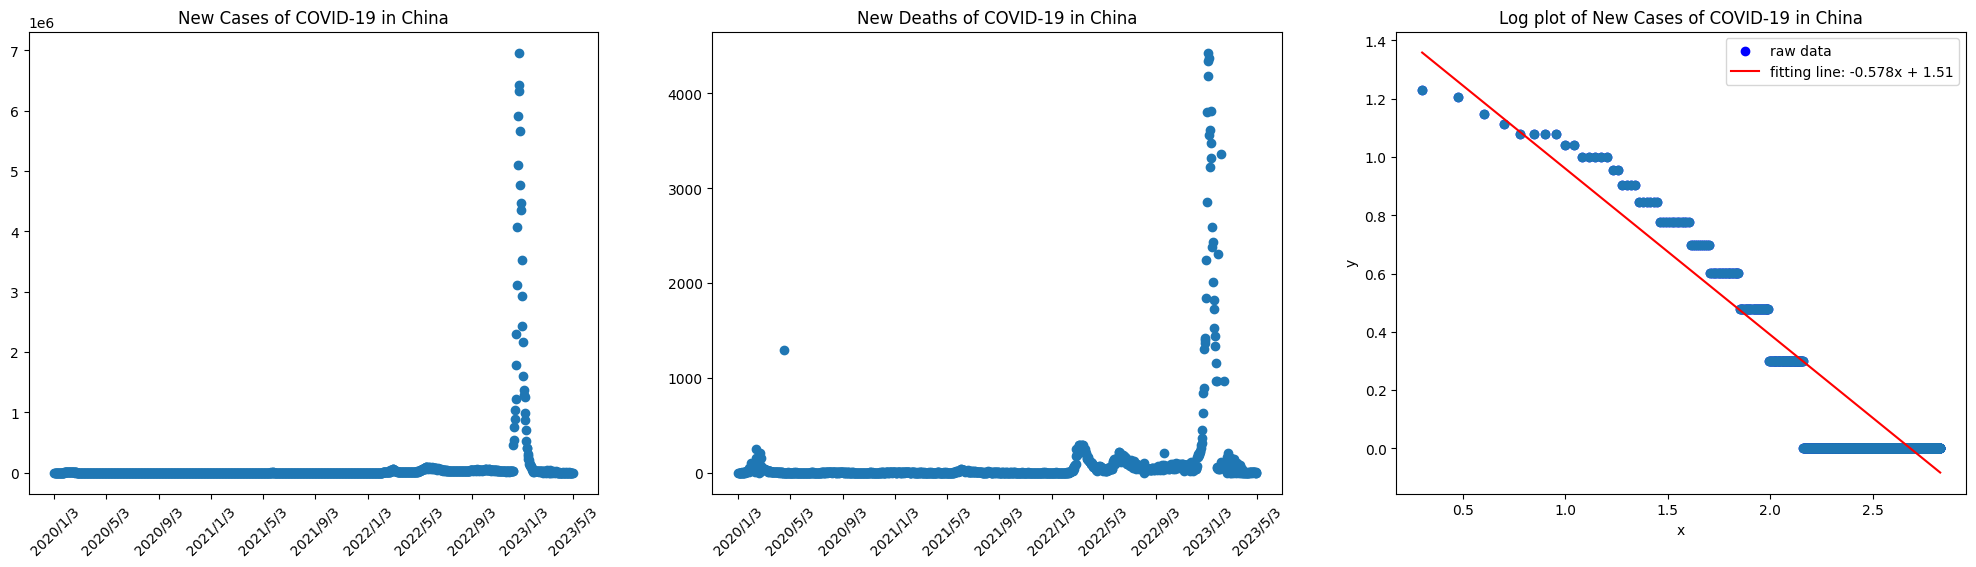

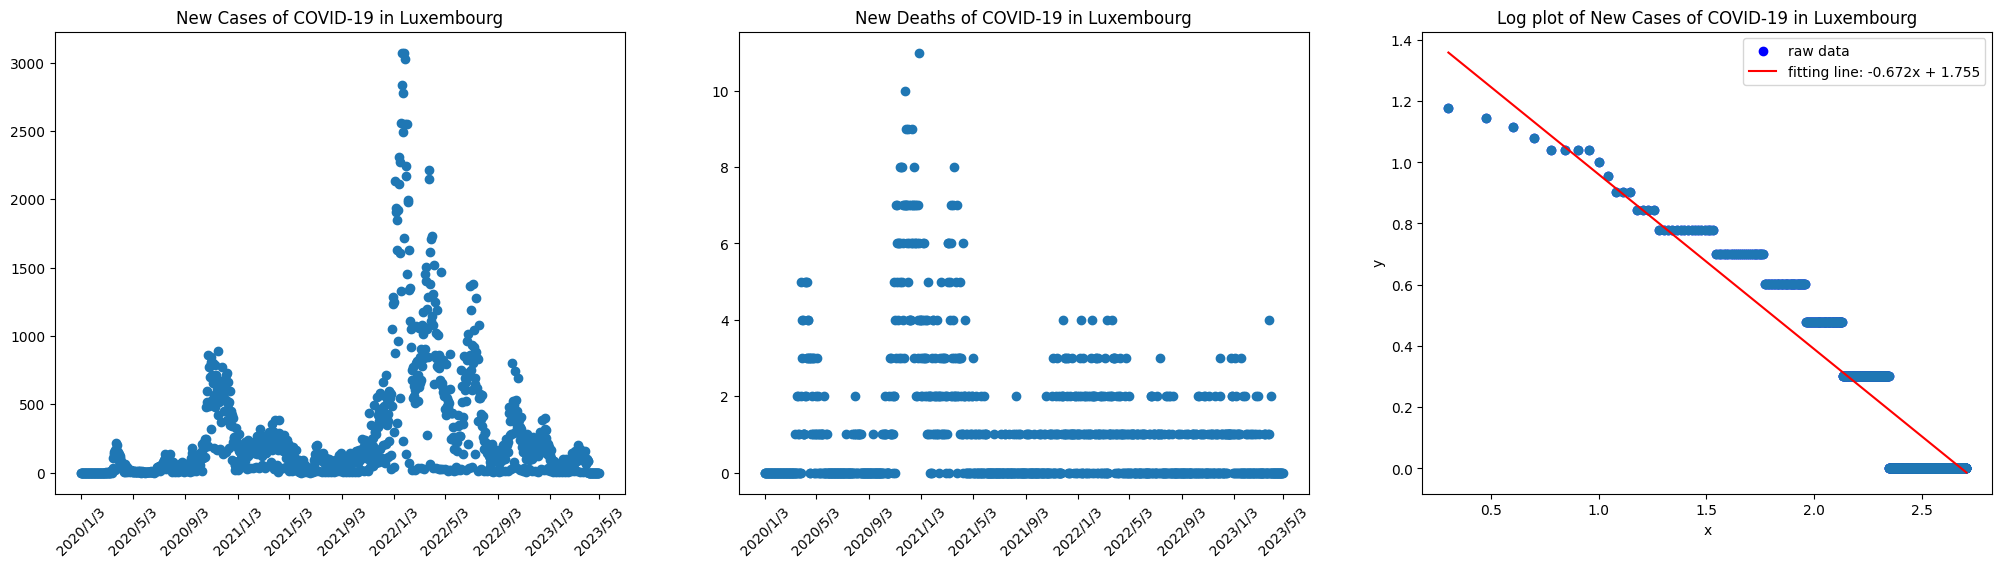

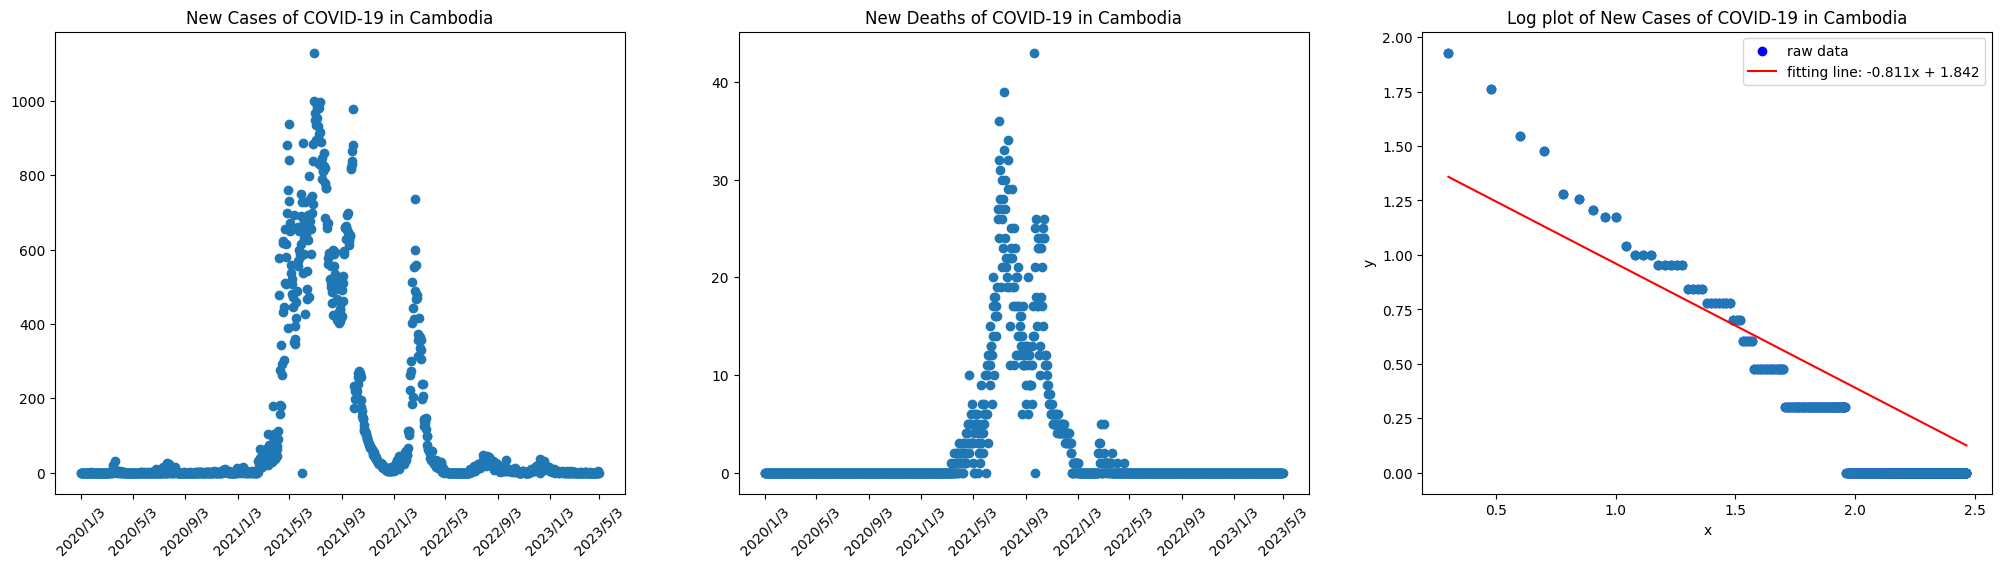

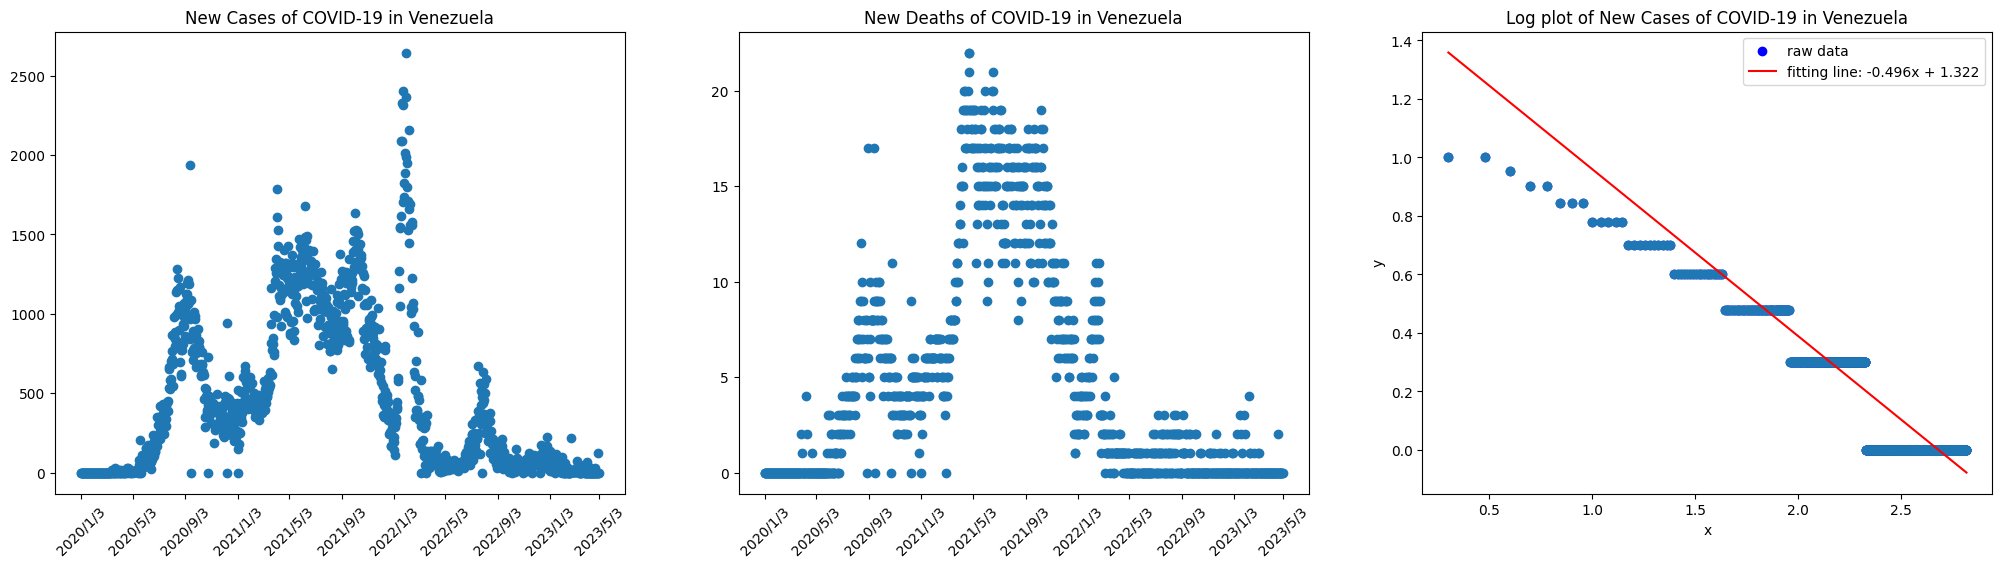

In [11]:
group1 = ["Afghanistan", "Zimbabwe", "China", "Luxembourg", "Cambodia", "Venezuela"]

for i in group1:
    civ = i
    time = locals()[str("{}".format("{}".format(civ))) + "_time"]
    New_cases = locals()[str("{}".format("{}".format(civ))) + "_New_cases"]
    Cumulative_cases = locals()[str("{}".format("{}".format(civ))) + "_Cumulative_cases"]
    New_deaths = locals()[str("{}".format("{}".format(civ))) + "_New_deaths"]
    Cumulative_deaths = locals()[str("{}".format("{}".format(civ))) + "_Cumulative_deaths"]



    count = pd.value_counts(New_cases)
    count = list(count)
    x = np.linspace(1, len(count), len(count))

    log_count = []
    log_x = []
    for j in range(len(count)):
        log_count.append(np.log10(count[j]))
        log_x.append(np.log10(x[j]))

    log_count.remove(log_count[0])
    log_x.remove(log_x[0])

    rang = ["2020/1/3", "2020/5/3", "2020/9/3",
            "2021/1/3", "2021/5/3", "2021/9/3",
            "2022/1/3", "2022/5/3", "2022/9/3",
            "2023/1/3", "2023/5/3"]
    
    plt.figure(figsize = (25, 6))
    plt.subplot(131)
    plt.title("New Cases of COVID-19 in {}".format(civ))
    plt.scatter(time, New_cases)
    plt.xticks(rang, rotation = 45)
    plt.subplot(132)
    plt.title("New Deaths of COVID-19 in {}".format(civ))
    plt.scatter(time, New_deaths)
    plt.xticks(rang, rotation = 45)
    plt.subplot(133)

    ##########################################################################
    # FITTING

    x0 = log_x
    y0 = log_count

    def function(x,a,b):
        return a*x + b
    fitt=(-0.7, 2.5) # 猜 x = 1, y = 2*pi
    popt,pcov= curve_fit(function, x0, y0, p0=fitt)
    perr=np.sqrt(np.diag(pcov))
    popt = np.round(popt, 3)

    plt.title("Log plot of New Cases Rate of COVID-19 in the World (With Fitting)")
    plt.scatter(x0, y0, color="blue", label="raw data")
    plt.plot(x0, 
            function(np.array(x0), -0.57, 1.53),
            color="red", 
            label="fitting line: {}x + {}".format(*popt))
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend(loc = 'upper right')

    ######################################################################
    plt.title("Log plot of New Cases of COVID-19 in {}".format(civ))
    plt.scatter(log_x, log_count)

plt.show()

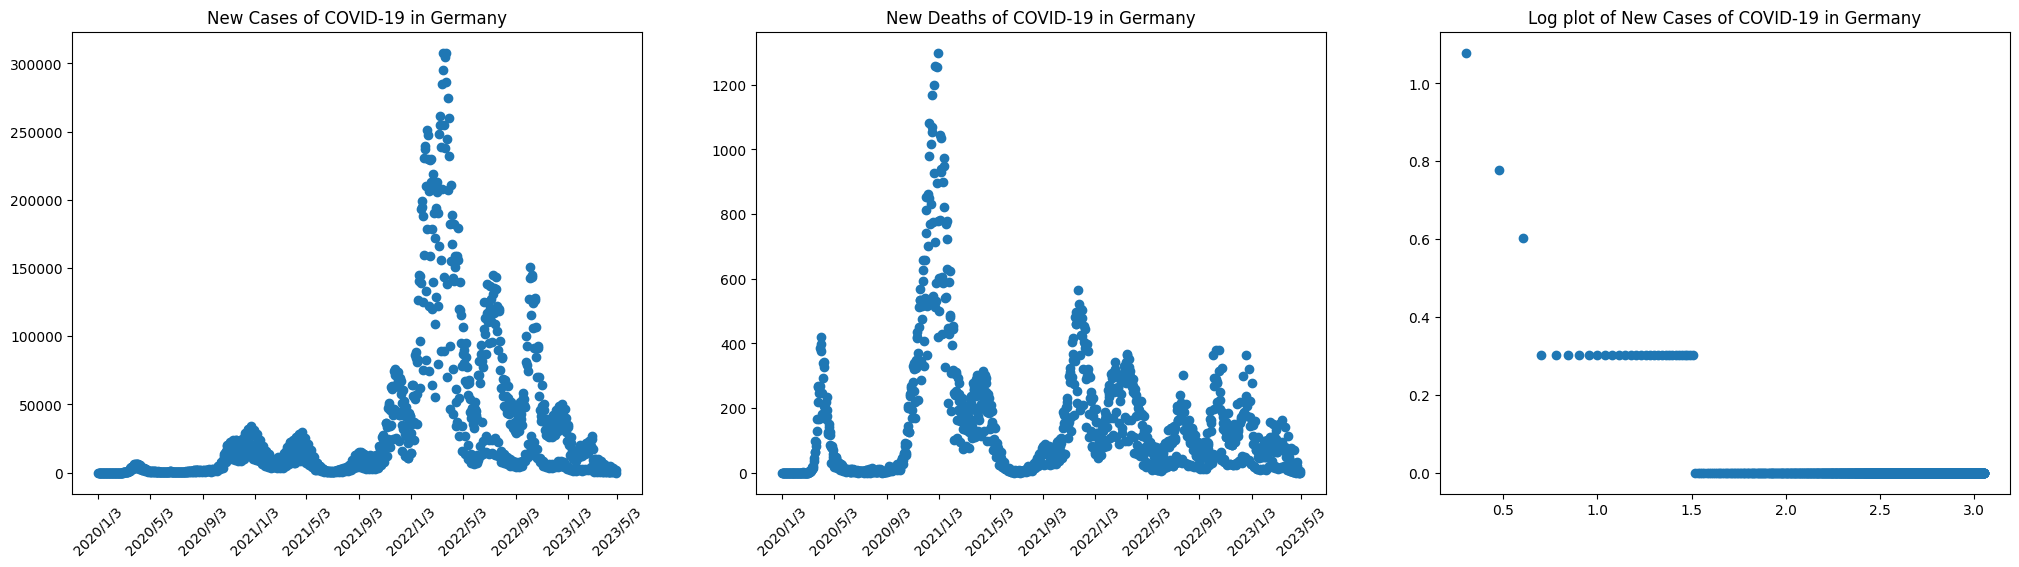

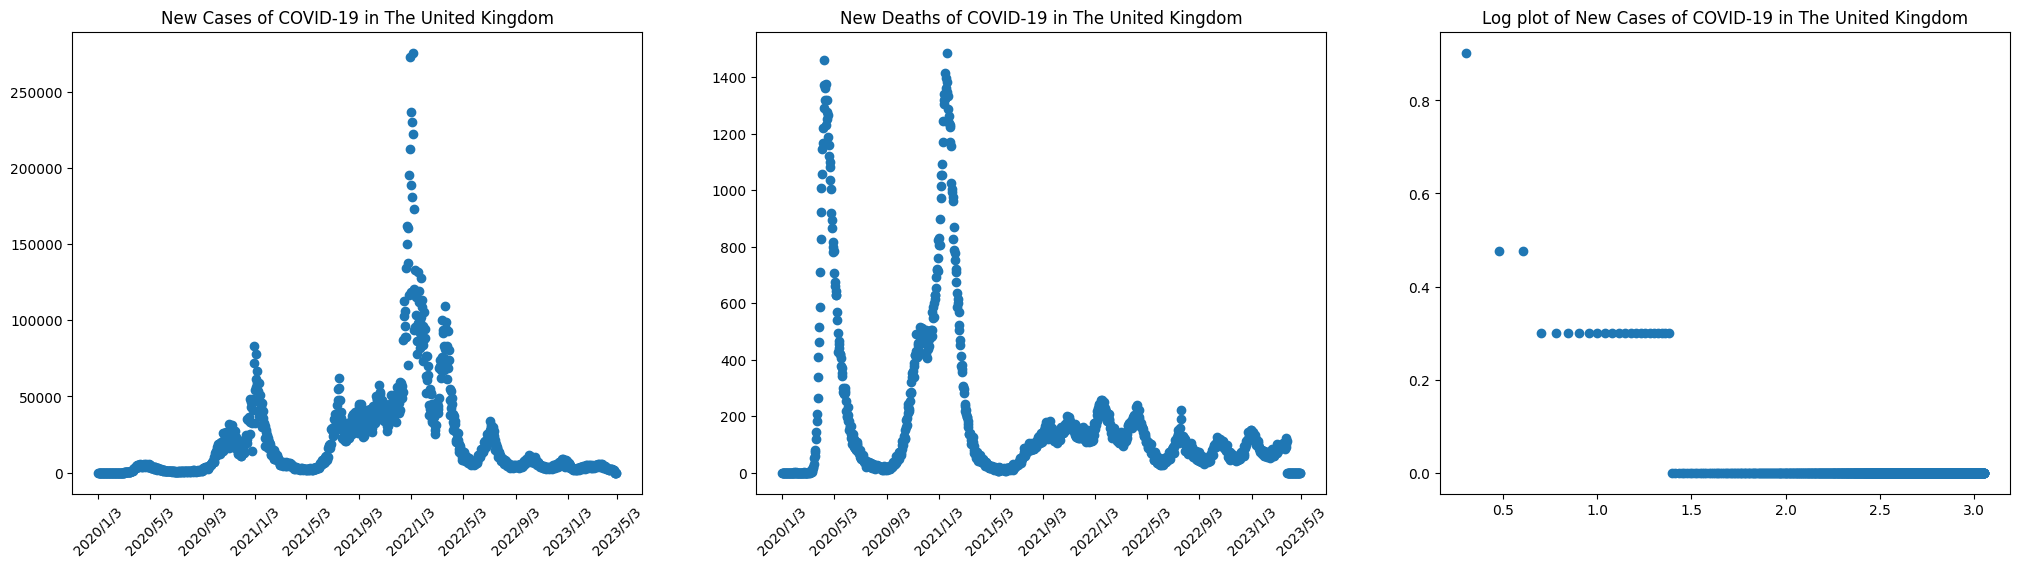

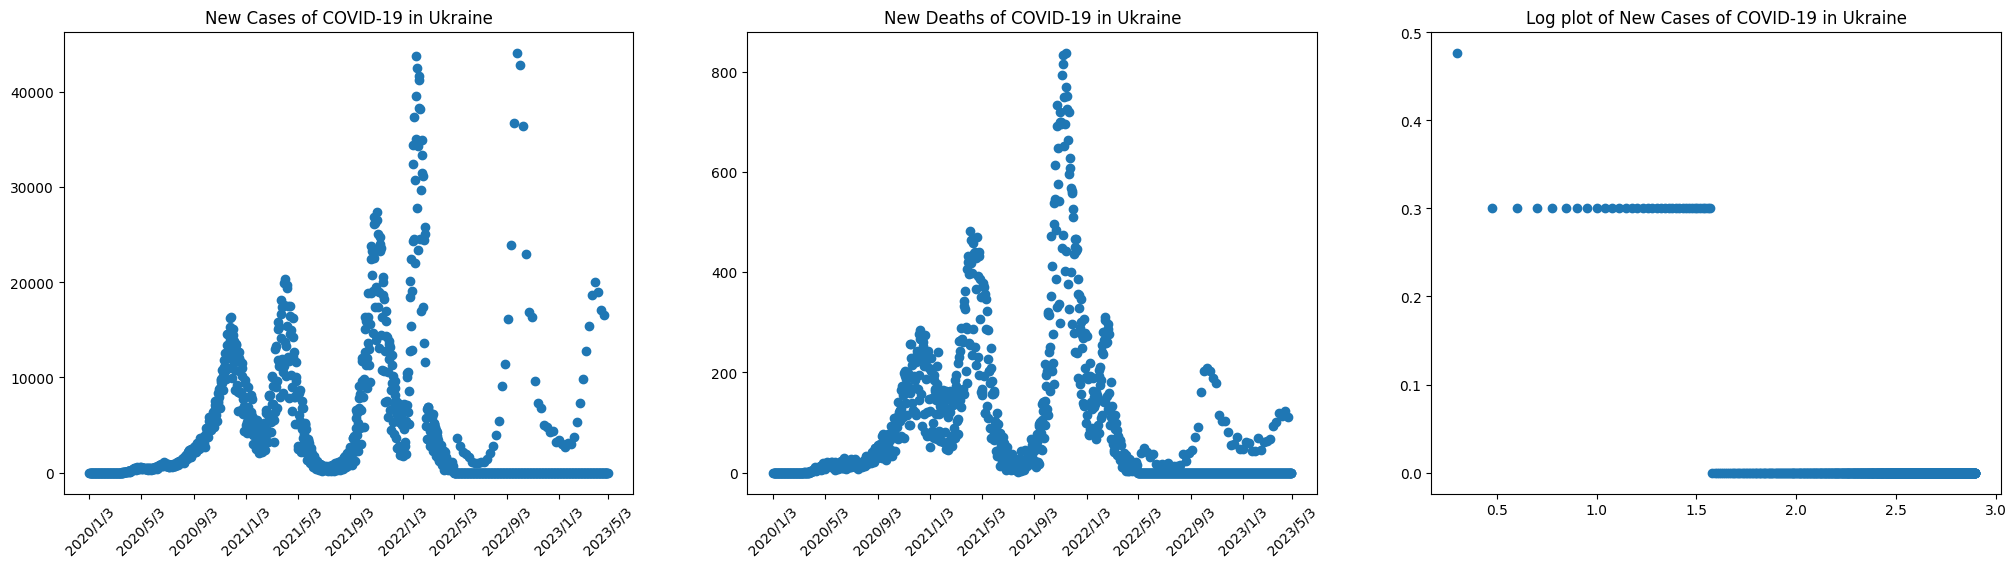

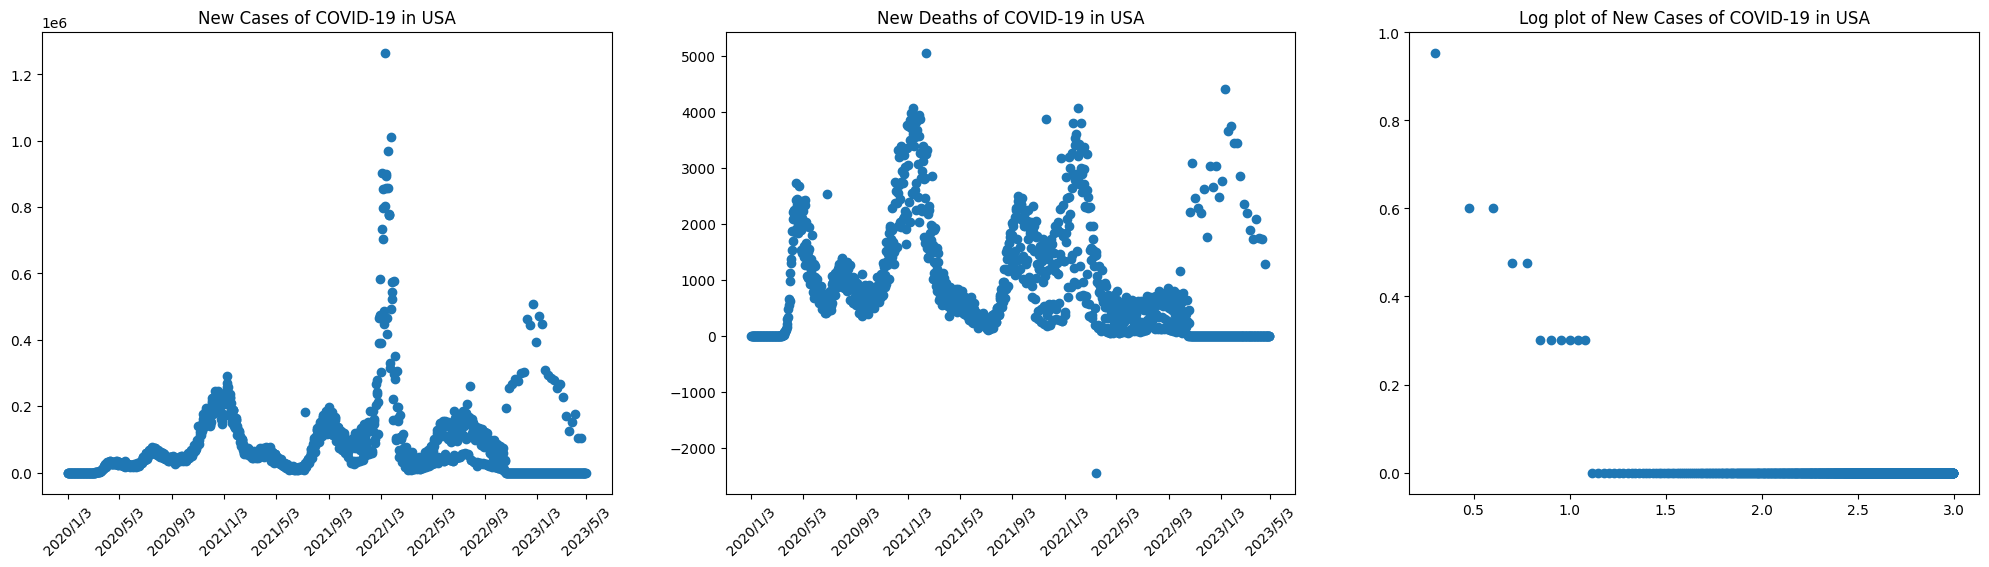

In [12]:
group2 = ["Germany", "The United Kingdom", "Ukraine", "USA"]

for i in group2:
    civ = i
    time = locals()[str("{}".format("{}".format(civ))) + "_time"]
    New_cases = locals()[str("{}".format("{}".format(civ))) + "_New_cases"]
    Cumulative_cases = locals()[str("{}".format("{}".format(civ))) + "_Cumulative_cases"]
    New_deaths = locals()[str("{}".format("{}".format(civ))) + "_New_deaths"]
    Cumulative_deaths = locals()[str("{}".format("{}".format(civ))) + "_Cumulative_deaths"]



    count = pd.value_counts(New_cases)
    count = list(count)
    x = np.linspace(1, len(count), len(count))

    log_count = []
    log_x = []
    for j in range(len(count)):
        log_count.append(np.log10(count[j]))
        log_x.append(np.log10(x[j]))

    log_count.remove(log_count[0])
    log_x.remove(log_x[0])

    rang = ["2020/1/3", "2020/5/3", "2020/9/3",
            "2021/1/3", "2021/5/3", "2021/9/3",
            "2022/1/3", "2022/5/3", "2022/9/3",
            "2023/1/3", "2023/5/3"]
    plt.figure(figsize = (25, 6))
    plt.subplot(131)
    plt.title("New Cases of COVID-19 in {}".format(civ))
    plt.scatter(time, New_cases)
    plt.xticks(rang, rotation = 45)
    plt.subplot(132)
    plt.title("New Deaths of COVID-19 in {}".format(civ))
    plt.scatter(time, New_deaths)
    plt.xticks(rang, rotation = 45)
    plt.subplot(133)
    plt.title("Log plot of New Cases of COVID-19 in {}".format(civ))
    plt.scatter(log_x, log_count)

plt.show()